In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression

In [88]:
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler

In [89]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

In [90]:
import datetime
from datetime import timedelta

In [91]:
df = pd.read_csv('all_auction.csv', encoding = 'utf-8')
df.head()

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價
0,2020/12/7,永固一-KY,55461,櫃檯買賣,無擔保轉換公司債,美國標,"6,800",100,1,680,...,0,0.5,0,0,0,0,0,0.0,NaN,NaN
1,2020/12/4,信邦七,30237,櫃檯買賣,無擔保轉換公司債,美國標,"11,400",101,1,"1,140",...,0,0.5,0,0,0,0,0,0.0,NaN,NaN
2,2020/12/4,達亞,6762,櫃檯買賣,初上櫃,美國標,"1,660",228.37,1,238,...,0,4.5,0,0,0,0,0,0.0,NaN,NaN
3,2020/12/3,森寶一,34891,櫃檯買賣,有擔保轉換公司債,美國標,900,103,1,90,...,0,0.5,0,0,0,0,0,0.0,NaN,NaN
4,2020/12/2,揚秦,2755,櫃檯買賣,初上櫃,美國標,"1,360",48,1,178,...,0,5.0,0,0,0,0,0,0.0,NaN,NaN


In [92]:
df['開標日期'] = pd.to_datetime(df['開標日期'])
df['開標日期']

0     2020-12-07
1     2020-12-04
2     2020-12-04
3     2020-12-03
4     2020-12-02
         ...    
205   2016-12-05
206   2016-12-07
207   2016-12-14
208   2016-12-16
209   2017-01-03
Name: 開標日期, Length: 210, dtype: datetime64[ns]

In [93]:
df.columns

Index(['開標日期', '證券名稱', '證券代號', '發行市場', '發行性質', '競拍方式', '競拍數量(張)', '最低投標價格(元)',
       '最低每標單投標數量(張)', '最高投(得)標數量(張)', '保證金成數(%)', '每一投標單投標處理費(元)',
       '撥券日期(上市、上櫃日期)', '主辦券商', '得標總金額(元)', '得標手續費率(%)', '總合格件', '合格投標數量(張)',
       '最低得標價格(元)', '最高得標價格(元)', '得標加權平均價格(元)', '承銷價格(元)', '投標最後一天平均成交價',
       '撥券日開盤價'],
      dtype='object')

In [94]:
df.shape

(210, 24)

In [95]:
df.loc[df['最低得標價格(元)'] != 0, '證券名稱'].value_counts()

精測        2
泰昇-KY     2
聯廣        2
泰福-KY     1
鈺齊五-KY    1
         ..
全球        1
東典光電      1
鈺太科技      1
雙鍵        1
安普新       1
Name: 證券名稱, Length: 207, dtype: int64

In [96]:
df[df['證券名稱'] =='精測']

## 兩筆為不同事件都要考慮

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價
159,2017-09-18,精測,6510,櫃檯買賣,上櫃增資,美國標,"1,530","1,267.33",1,153,...,"1,772,575,830",1.0,216,"1,381","1,267.33","1,320","1,283.55",1267.33,1330.00,1250.0
185,2016-03-10,精測,6510,櫃檯買賣,初上櫃,美國標,1896,300,3,236,...,854748380,2.5,"2,667","17,457",440.2,482,450.82,360.00,478.18,590.0


In [97]:
df[df['證券名稱'] =='泰昇-KY']

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價
183,2017-01-03,泰昇-KY,8480,集中交易市場,第一上市初上市,美國標,"3,400",82.31,2,425,...,"381,534,290",2.5,"1,066","12,763",110.22,124,112.22,107.0,NaN,114.5
209,2017-01-03,泰昇-KY,8480,集中市場,第一上市初上市,美國標,3400,82.31,2,425,...,0,2.5,NaN,NaN,0,0,0,0.0,NaN,NaN


In [98]:
## 刪掉重複的一筆
index_name = df[(df['得標總金額(元)'] == '0') & (df['證券名稱'] =='泰昇-KY')].index
df.drop(index_name, inplace = True)
df.reset_index()
df[df['證券名稱'] =='泰昇-KY']

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價
183,2017-01-03,泰昇-KY,8480,集中交易市場,第一上市初上市,美國標,"3,400",82.31,2,425,...,"381,534,290",2.5,"1,066","12,763",110.22,124,112.22,107.0,NaN,114.5


In [99]:
df[df['證券名稱'] =='聯廣']

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價
137,2018-03-09,聯廣,8497,集中交易市場,初上市,美國標,"4,680",40,1,672,...,"229,545,830",4.0,"1,383","23,949",47.6,53.1,49.05,46.0,58.53,NaN
145,2018-01-08,聯廣,8497,集中交易市場,初上市,美國標,"4,680",47.3,1,672,...,0,4.0,500,"4,308",0,0,0,0.0,70.77,NaN


In [100]:
index_name = df[(df['得標總金額(元)'] == '0') & (df['證券名稱'] =='聯廣')].index
df.drop(index_name, inplace = True)
df.reset_index()
df[df['證券名稱'] =='聯廣']

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價
137,2018-03-09,聯廣,8497,集中交易市場,初上市,美國標,"4,680",40,1,672,...,"229,545,830",4.0,"1,383","23,949",47.6,53.1,49.05,46.0,58.53,NaN


## 不考慮得標總金額為 0 的資料 (可能是流標 或 正在標) 

In [101]:
index_name = df[(df['得標總金額(元)'] == '0')].index
df.drop(index_name, inplace = True)

In [102]:
df.shape

(199, 24)

In [103]:
df[df['得標總金額(元)'] == '0']['證券名稱']

Series([], Name: 證券名稱, dtype: object)

* 羅麗芬-ky, 聯廣, 泰福-ky 流標
* 其餘則是還在進行中 (資料取自2020.11.27)

In [104]:
def label_stock(row):
    if row['發行性質'] in ['有擔保轉換公司債','無擔保轉換公司債']:
        return "cb"
    else:
        return "stock"       

In [105]:
df['類別'] = df.apply(lambda row : label_stock(row), axis = 1)
sum(df['類別'] == 'cb')

26

In [106]:
df['類別']

7      stock
8      stock
9         cb
10     stock
11     stock
       ...  
204    stock
205    stock
206    stock
207    stock
208    stock
Name: 類別, Length: 199, dtype: object

## 好奇每個時間投標熱度有沒有差

In [107]:
df_time = df[['開標日期','證券名稱','證券代號','類別','競拍數量(張)', '最低投標價格(元)', '最低每標單投標數量(張)','每一投標單投標處理費(元)', '得標手續費率(%)', '投標最後一天平均成交價', '最低得標價格(元)','最高得標價格(元)', '得標加權平均價格(元)','投標最後一天平均成交價','總合格件', '合格投標數量(張)']]

In [108]:
df_time.dtypes

開標日期             datetime64[ns]
證券名稱                     object
證券代號                      int64
類別                       object
競拍數量(張)                  object
最低投標價格(元)                object
最低每標單投標數量(張)              int64
每一投標單投標處理費(元)             int64
得標手續費率(%)               float64
投標最後一天平均成交價             float64
最低得標價格(元)                object
最高得標價格(元)                object
得標加權平均價格(元)              object
投標最後一天平均成交價             float64
總合格件                     object
合格投標數量(張)                object
dtype: object

In [109]:
obj_col = ['競拍數量(張)', '最低投標價格(元)', '最低得標價格(元)', '最高得標價格(元)', '得標加權平均價格(元)', '總合格件', '合格投標數量(張)']
for col in obj_col:
    df_time[col] = df_time[col].apply(lambda x: x.replace(',', '')) 
    df_time[col] = df_time[col].apply(pd.to_numeric, errors = 'coerce')

In [110]:
df_time['總投標金額'] = df_time['得標加權平均價格(元)'] * df_time['合格投標數量(張)']
df_time['最低得標相對底標漲幅'] = df_time['最低得標價格(元)']/ df_time['最低投標價格(元)']*100 -100
df_time['加權得標相對底標漲幅'] = df_time['得標加權平均價格(元)']/ df_time['最低投標價格(元)']*100 -100
df_time['最高得標相對底標漲幅'] = df_time['最高得標價格(元)']/ df_time['最低投標價格(元)']*100 -100
df_time['投標競爭度'] = df_time['合格投標數量(張)'] / df_time['競拍數量(張)']
df_time['每標平均張數'] = df_time['合格投標數量(張)'] / df_time['總合格件']

In [111]:
df_time.index = df_time['開標日期']

Text(0.5, 1.0, '最高得標相對底標漲幅(%)')

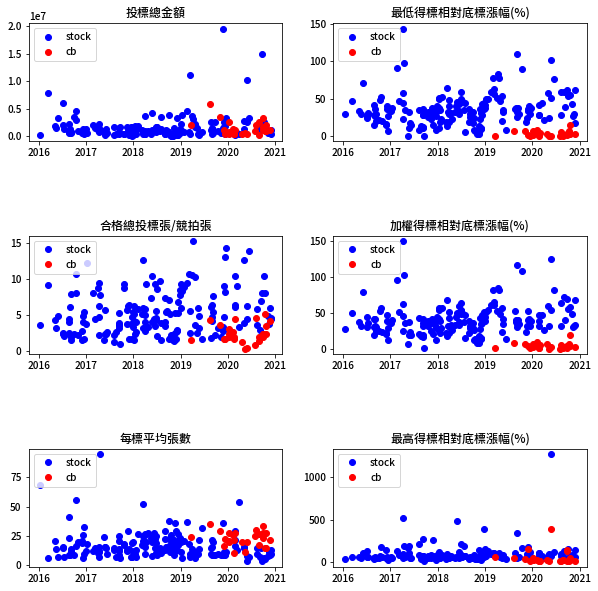

In [112]:
fig, ax = plt.subplots(3, 2, figsize = (10, 10))
plt.subplots_adjust(hspace = 0.8)
ax[0,0].plot(df_time[df_time['類別'] == 'stock']['總投標金額'], 'bo')
ax[0,0].plot(df_time[df_time['類別'] == 'cb']['總投標金額'], 'ro')
ax[0,0].legend(['stock', 'cb'], loc = 2)
ax[0,0].set_title('投標總金額')

ax[1,0].plot(df_time[df_time['類別'] == 'stock']['投標競爭度'], 'bo')
ax[1,0].plot(df_time[df_time['類別'] == 'cb']['投標競爭度'], 'ro')
ax[1,0].legend(['stock', 'cb'], loc = 2)
ax[1,0].set_title('合格總投標張/競拍張')

ax[2,0].plot(df_time[df_time['類別'] == 'stock']['每標平均張數'], 'bo')
ax[2,0].plot(df_time[df_time['類別'] == 'cb']['每標平均張數'], 'ro')
ax[2,0].legend(['stock', 'cb'], loc = 2)
ax[2,0].set_title('每標平均張數')

ax[0,1].plot(df_time[df_time['類別'] == 'stock']['最低得標相對底標漲幅'], 'bo')
ax[0,1].plot(df_time[df_time['類別'] == 'cb']['最低得標相對底標漲幅'], 'ro')
ax[0,1].legend(['stock', 'cb'], loc = 2)
ax[0,1].set_title('最低得標相對底標漲幅(%)')

ax[1,1].plot(df_time[df_time['類別'] == 'stock']['加權得標相對底標漲幅'], 'bo')
ax[1,1].plot(df_time[df_time['類別'] == 'cb']['加權得標相對底標漲幅'], 'ro')
ax[1,1].legend(['stock', 'cb'], loc = 2)
ax[1,1].set_title('加權得標相對底標漲幅(%)')

ax[2,1].plot(df_time[df_time['類別'] == 'stock']['最高得標相對底標漲幅'], 'bo')
ax[2,1].plot(df_time[df_time['類別'] == 'cb']['最高得標相對底標漲幅'], 'ro')
ax[2,1].legend(['stock', 'cb'], loc = 2)
ax[2,1].set_title('最高得標相對底標漲幅(%)')

## 近兩年有四檔投標金額異常高：

In [113]:
df_time[['證券名稱','總投標金額']].sort_values(by = ['總投標金額'] ,ascending = False).head(4)

,證券名稱,總投標金額
開標日期,,
2019-11-25,和潤企業,19511129.54
2020-09-23,汎德永業,14825916.30
2019-03-13,緯穎,11033970.84
2020-05-25,昇佳電子,10149612.66


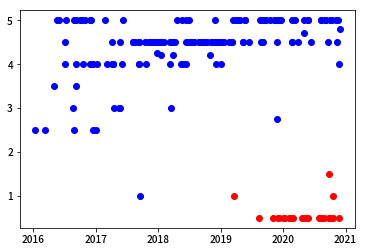

In [114]:
plt.plot(df_time[df_time['類別'] == 'stock']['得標手續費率(%)'], 'bo', )
plt.plot(df_time[df_time['類別'] == 'cb']['得標手續費率(%)'], 'ro', )

## 將df只選出開標前知道的資訊 + 最低得標價(Y)

In [115]:
df_1 = df[['開標日期','證券名稱', '證券代號', '發行市場', '發行性質', '競拍數量(張)','類別', '最低投標價格(元)', '最低每標單投標數量(張)','每一投標單投標處理費(元)', '得標手續費率(%)', '投標最後一天平均成交價', '最低得標價格(元)']]
df_1.head()

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍數量(張),類別,最低投標價格(元),最低每標單投標數量(張),每一投標單投標處理費(元),得標手續費率(%),投標最後一天平均成交價,最低得標價格(元)
7,2020-11-27,耀登科技,3138,集中交易市場,初上市,"3,740",stock,42.59,1,400,4.8,80.84,68.6
8,2020-11-26,叡揚資訊,6752,櫃檯買賣,初上櫃,"1,800",stock,50,1,400,4.0,67.49,58.51
9,2020-11-23,台驊四,26364,櫃檯買賣,無擔保轉換公司債,"2,550",cb,102,1,400,0.5,NaN,104.2
10,2020-11-17,亞泰金屬,6727,櫃檯買賣,初上櫃,"2,005",stock,48,1,400,5.0,68.97,62.4
11,2020-11-10,八貫,1342,集中交易市場,初上市,"4,234",stock,50,1,400,4.5,76.48,63.6


In [116]:
df_1.shape

(199, 13)

In [117]:
df_1['發行性質'].value_counts()

初上櫃         90
初上市         57
第一上市初上市     20
無擔保轉換公司債    18
有擔保轉換公司債     8
第一上櫃初上櫃      5
上櫃增資         1
Name: 發行性質, dtype: int64

In [118]:
df1_stock = df_1[df_1['類別'] == 'stock']
df1_cb = df_1[df_1['類別'] == 'cb']

In [119]:
print('股票',df1_stock.shape[0],'可轉債', df1_cb.shape[0])

股票 173 可轉債 26


## 檢查缺失值 把股票和可轉債分開看


In [120]:
df1_stock.isnull().apply(lambda x: sum(x))

開標日期              0
證券名稱              0
證券代號              0
發行市場              0
發行性質              0
競拍數量(張)           0
類別                0
最低投標價格(元)         0
最低每標單投標數量(張)      0
每一投標單投標處理費(元)     0
得標手續費率(%)         0
投標最後一天平均成交價      25
最低得標價格(元)         0
dtype: int64

In [121]:
df1_cb.isnull().apply(lambda x: sum(x))

開標日期              0
證券名稱              0
證券代號              0
發行市場              0
發行性質              0
競拍數量(張)           0
類別                0
最低投標價格(元)         0
最低每標單投標數量(張)      0
每一投標單投標處理費(元)     0
得標手續費率(%)         0
投標最後一天平均成交價      26
最低得標價格(元)         0
dtype: int64

In [122]:
df1_stock.dropna(inplace = True)
df1_stock.shape

(148, 13)

In [123]:
df1_stock.isnull().apply(lambda x: sum(x))

開標日期             0
證券名稱             0
證券代號             0
發行市場             0
發行性質             0
競拍數量(張)          0
類別               0
最低投標價格(元)        0
最低每標單投標數量(張)     0
每一投標單投標處理費(元)    0
得標手續費率(%)        0
投標最後一天平均成交價      0
最低得標價格(元)        0
dtype: int64

In [124]:
df1_stock.dtypes

開標日期             datetime64[ns]
證券名稱                     object
證券代號                      int64
發行市場                     object
發行性質                     object
競拍數量(張)                  object
類別                       object
最低投標價格(元)                object
最低每標單投標數量(張)              int64
每一投標單投標處理費(元)             int64
得標手續費率(%)               float64
投標最後一天平均成交價             float64
最低得標價格(元)                object
dtype: object

In [125]:
obj_col = ['競拍數量(張)', '最低投標價格(元)', '最低得標價格(元)']
for col in obj_col:
    df1_stock[col] = df1_stock[col].apply(lambda x: x.replace(',', '')) 
    df1_stock[col] = df1_stock[col].apply(pd.to_numeric, errors = 'coerce')

df1_stock.isnull().apply(lambda x: sum(x))

開標日期             0
證券名稱             0
證券代號             0
發行市場             0
發行性質             0
競拍數量(張)          0
類別               0
最低投標價格(元)        0
最低每標單投標數量(張)     0
每一投標單投標處理費(元)    0
得標手續費率(%)        0
投標最後一天平均成交價      0
最低得標價格(元)        0
dtype: int64

In [126]:
df1_stock.dtypes

開標日期             datetime64[ns]
證券名稱                     object
證券代號                      int64
發行市場                     object
發行性質                     object
競拍數量(張)                   int64
類別                       object
最低投標價格(元)               float64
最低每標單投標數量(張)              int64
每一投標單投標處理費(元)             int64
得標手續費率(%)               float64
投標最後一天平均成交價             float64
最低得標價格(元)               float64
dtype: object

In [127]:
df1_stock['得標手續費率(%)'].value_counts()

4.50    72
5.00    42
4.00    18
2.50     4
3.00     4
4.20     3
3.50     2
4.80     1
1.00     1
2.75     1
Name: 得標手續費率(%), dtype: int64

In [128]:
df1_stock['每一投標單投標處理費(元)'].value_counts()

400    119
500     29
Name: 每一投標單投標處理費(元), dtype: int64

## 來畫相關係數圖!!!

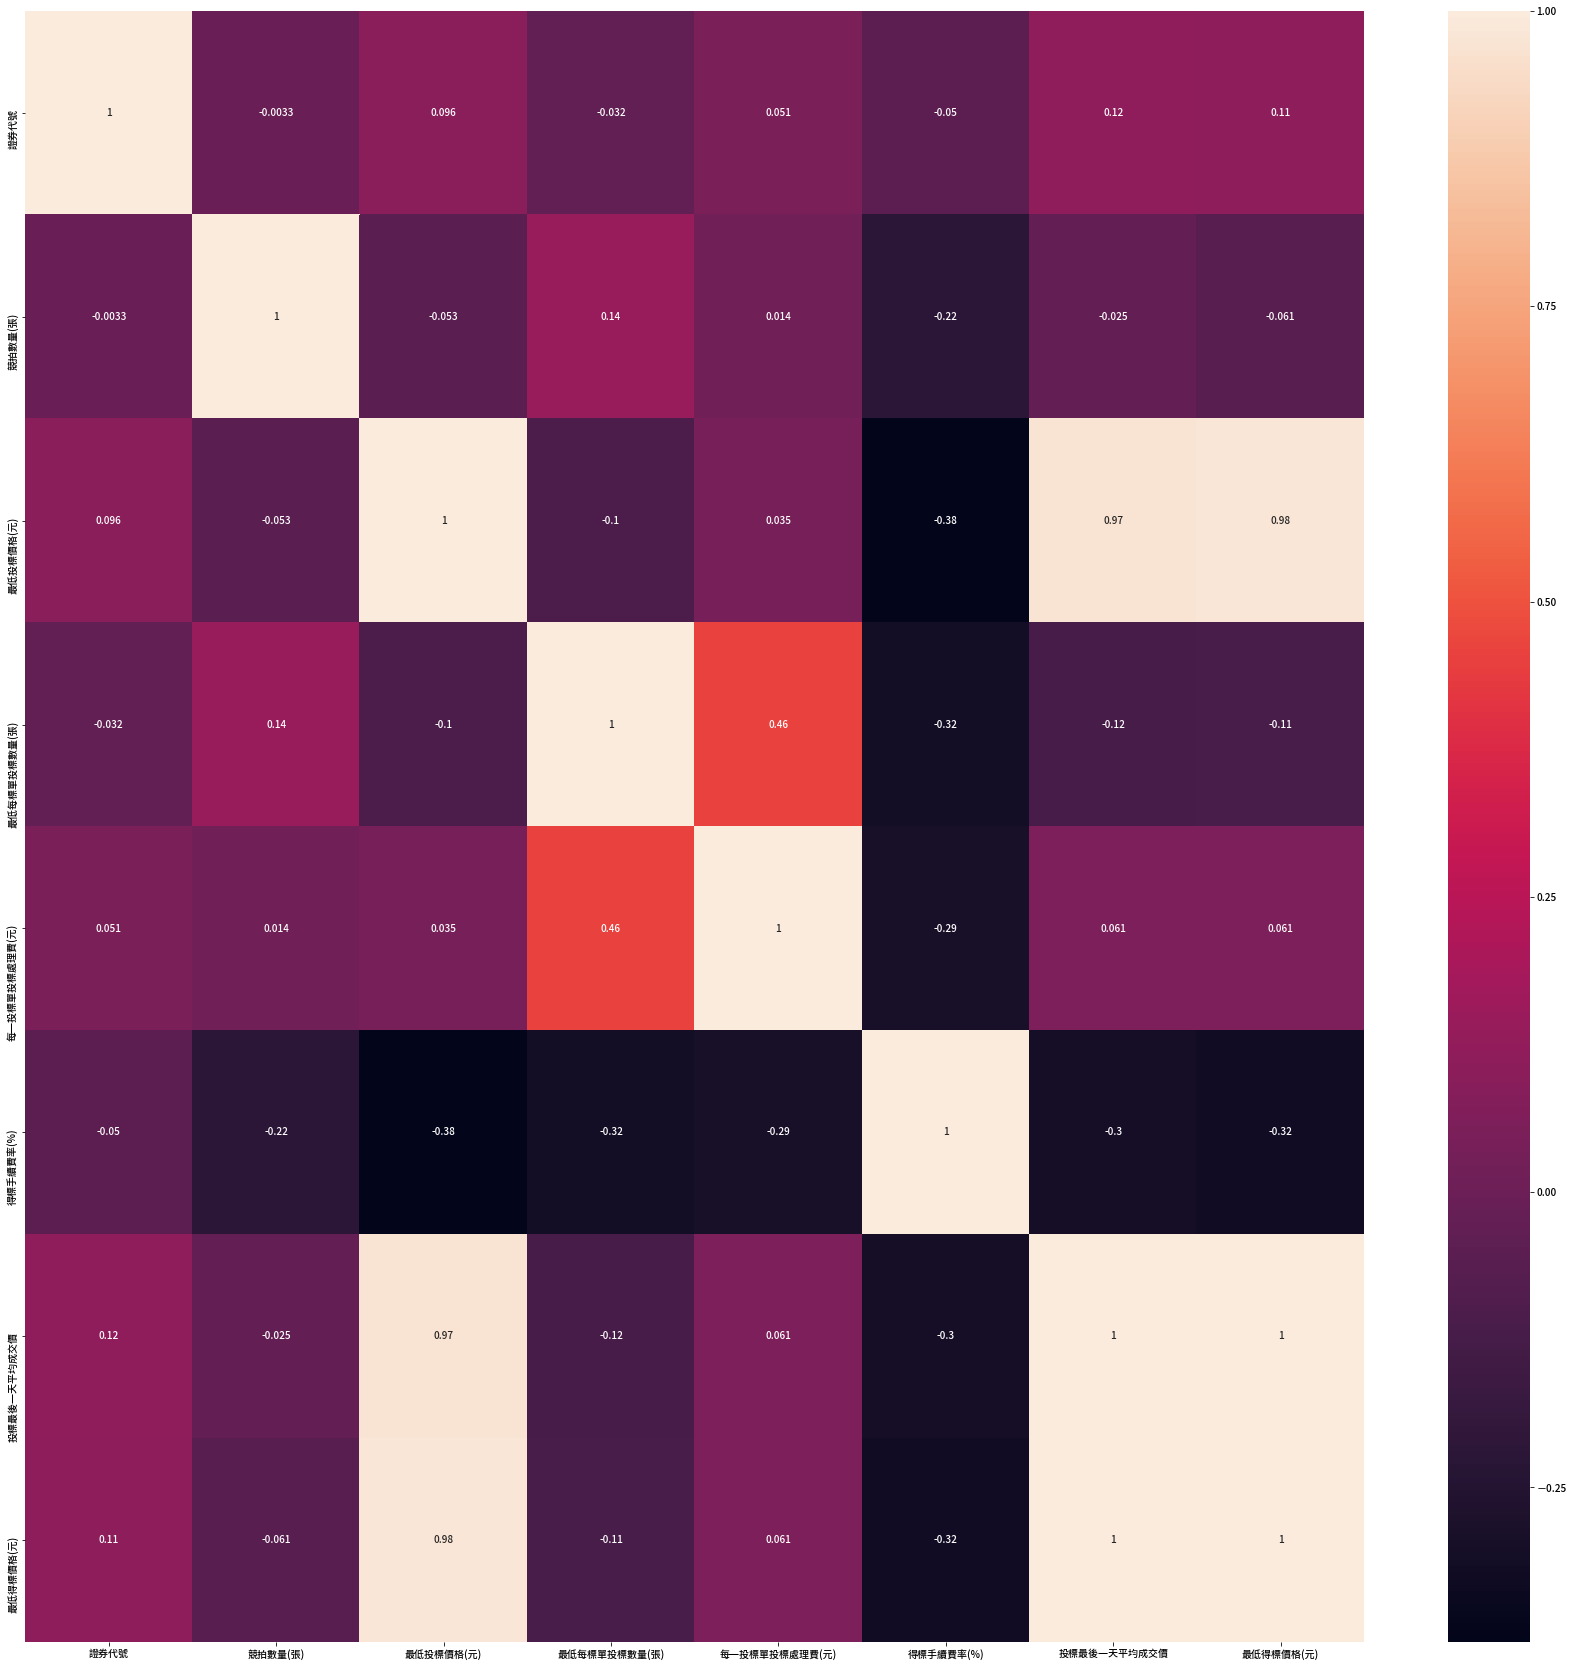

In [129]:
plt.figure(figsize=(30, 30))
corrMatrix = df1_stock.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

C:\Users\hello\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


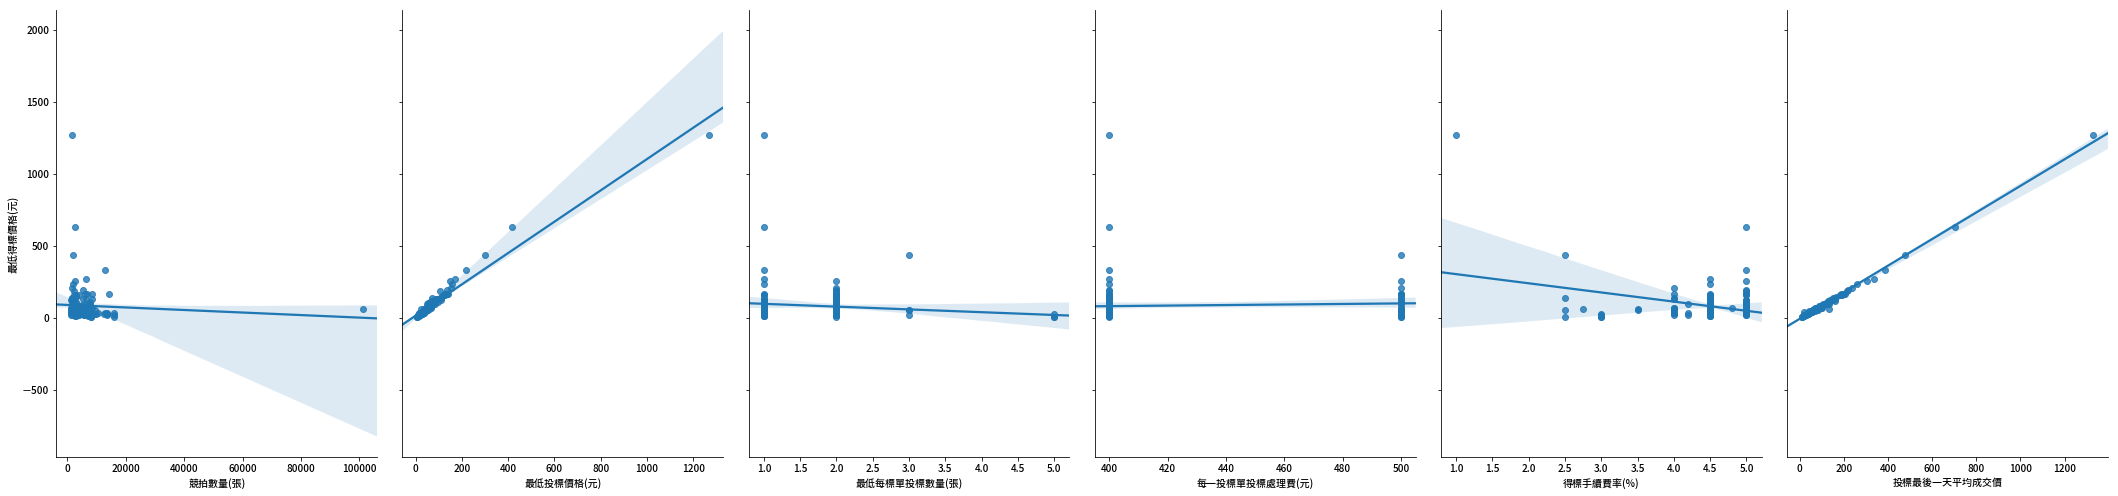

In [130]:
sn.pairplot(df1_stock, x_vars=['競拍數量(張)','最低投標價格(元)','最低每標單投標數量(張)','每一投標單投標處理費(元)','得標手續費率(%)','投標最後一天平均成交價'], y_vars='最低得標價格(元)', size=7, aspect=0.7, kind='reg')


## 發現最低投標價12多多那筆是outlier

In [131]:
outlier = df1_stock['最低投標價格(元)'] > 1200
df1_stock[outlier]

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍數量(張),類別,最低投標價格(元),最低每標單投標數量(張),每一投標單投標處理費(元),得標手續費率(%),投標最後一天平均成交價,最低得標價格(元)
159,2017-09-18,精測,6510,櫃檯買賣,上櫃增資,1530,stock,1267.33,1,400,1.0,1330.0,1267.33


In [132]:
index = df1_stock[outlier].index
df1_stock.drop(index, inplace = True)

In [133]:
index = df1_stock[df1_stock['發行性質']=='第一上市初上市'].index
df1_stock.drop(index, inplace = True)

C:\Users\hello\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


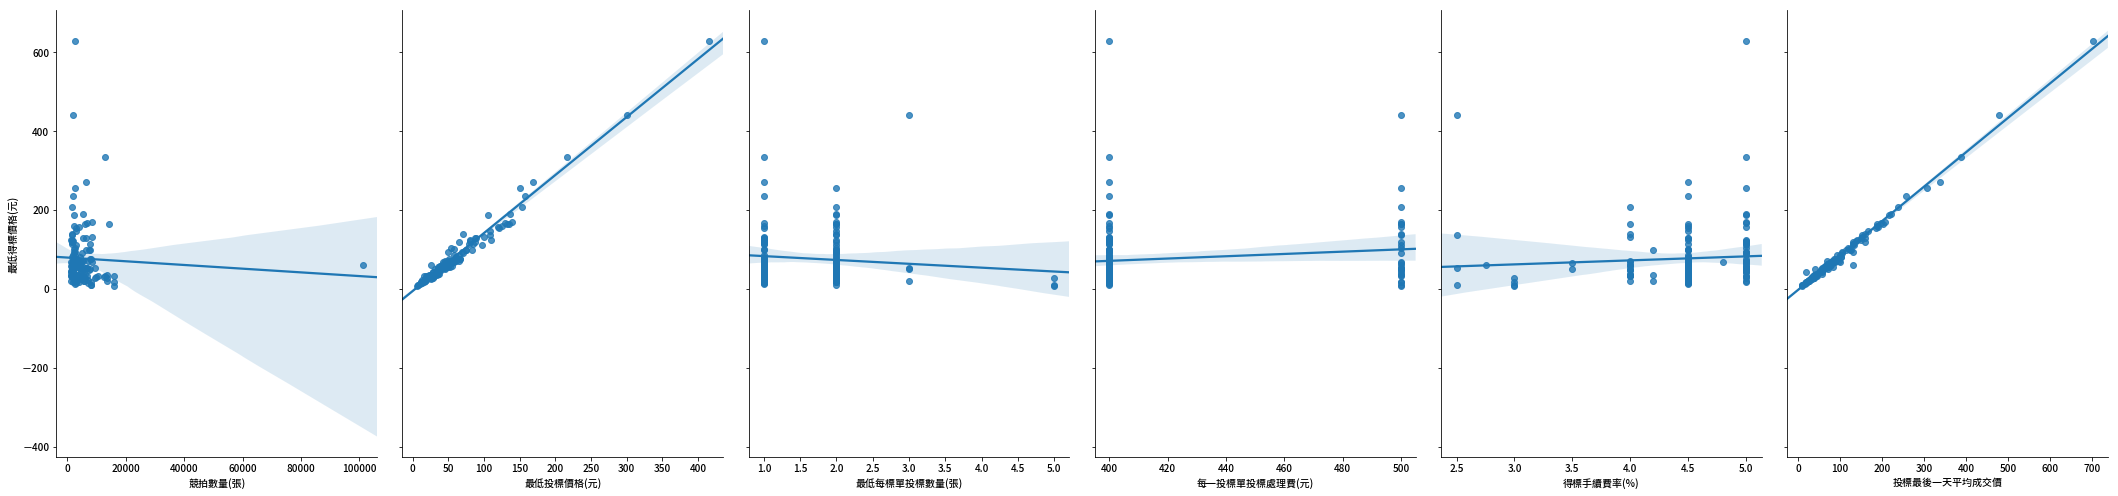

In [134]:
sn.pairplot(df1_stock, x_vars=['競拍數量(張)','最低投標價格(元)','最低每標單投標數量(張)','每一投標單投標處理費(元)','得標手續費率(%)','投標最後一天平均成交價'], y_vars='最低得標價格(元)', size=7, aspect=0.7, kind='reg')

## 將 最低每標單投標數量(張), 每一投標單投標處理費(元), 得標手續費率(%) 轉成類別資料

In [135]:
dummies = pd.get_dummies(df1_stock['最低每標單投標數量(張)'])
dummies.columns = ['最低每標單投_1','最低每標單投_2','最低每標單投_3','最低每標單投_5']
dummies.head()

,最低每標單投_1,最低每標單投_2,最低每標單投_3,最低每標單投_5
7,1,0,0,0
8,1,0,0,0
10,1,0,0,0
11,1,0,0,0
12,1,0,0,0


In [136]:
df1_stock = pd.concat([df1_stock, dummies], axis = 1)
df1_stock.drop(['最低每標單投標數量(張)'], axis = 1, inplace = True)
df1_stock.head()

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍數量(張),類別,最低投標價格(元),每一投標單投標處理費(元),得標手續費率(%),投標最後一天平均成交價,最低得標價格(元),最低每標單投_1,最低每標單投_2,最低每標單投_3,最低每標單投_5
7,2020-11-27,耀登科技,3138,集中交易市場,初上市,3740,stock,42.59,400,4.8,80.84,68.60,1,0,0,0
8,2020-11-26,叡揚資訊,6752,櫃檯買賣,初上櫃,1800,stock,50.00,400,4.0,67.49,58.51,1,0,0,0
10,2020-11-17,亞泰金屬,6727,櫃檯買賣,初上櫃,2005,stock,48.00,400,5.0,68.97,62.40,1,0,0,0
11,2020-11-10,八貫,1342,集中交易市場,初上市,4234,stock,50.00,400,4.5,76.48,63.60,1,0,0,0
12,2020-11-06,陞達科技,4945,櫃檯買賣,初上櫃,2244,stock,34.86,400,5.0,40.32,49.90,1,0,0,0


In [137]:
dummies = pd.get_dummies(df1_stock['每一投標單投標處理費(元)'])
dummies.columns = ['處理費_400','處理費_500']
df1_stock = pd.concat([df1_stock, dummies], axis = 1)
df1_stock.drop(['每一投標單投標處理費(元)'], axis = 1, inplace = True)
df1_stock.head()

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍數量(張),類別,最低投標價格(元),得標手續費率(%),投標最後一天平均成交價,最低得標價格(元),最低每標單投_1,最低每標單投_2,最低每標單投_3,最低每標單投_5,處理費_400,處理費_500
7,2020-11-27,耀登科技,3138,集中交易市場,初上市,3740,stock,42.59,4.8,80.84,68.60,1,0,0,0,1,0
8,2020-11-26,叡揚資訊,6752,櫃檯買賣,初上櫃,1800,stock,50.00,4.0,67.49,58.51,1,0,0,0,1,0
10,2020-11-17,亞泰金屬,6727,櫃檯買賣,初上櫃,2005,stock,48.00,5.0,68.97,62.40,1,0,0,0,1,0
11,2020-11-10,八貫,1342,集中交易市場,初上市,4234,stock,50.00,4.5,76.48,63.60,1,0,0,0,1,0
12,2020-11-06,陞達科技,4945,櫃檯買賣,初上櫃,2244,stock,34.86,5.0,40.32,49.90,1,0,0,0,1,0


In [138]:
dummies = pd.get_dummies(df1_stock['得標手續費率(%)'])
dummies.columns = ['手續費_2.5', '手續費_2.75', '手續費_3', '手續費_3.5', '手續費_4', '手續費_4.2', '手續費_4.5', '手續費_4.8', '手續費_5']
df1_stock = pd.concat([df1_stock, dummies], axis = 1)
df1_stock.drop(['得標手續費率(%)'], axis = 1, inplace = True)

In [139]:
dummies = pd.get_dummies(df1_stock['發行性質'])
df1_stock = pd.concat([df1_stock, dummies], axis = 1)
df1_stock.drop(['發行性質'], axis = 1, inplace = True)

In [140]:
df1_stock.shape

(146, 26)

In [141]:
df1_stock.reset_index(drop = True, inplace = True)

In [142]:
df1_stock.drop(['開標日期', '證券名稱', '證券代號', '發行市場','類別'], axis = 1, inplace = True)

In [143]:
## 除了類別資料 都套上scaler
#sclaler = MinMaxScaler()
#num_vars = ['競拍數量(張)', '最低投標價格(元)', '投標最後一天平均成交價', '最低得標價格(元)']
#df1_stock[num_vars] = sclaler.fit_transform(df1_stock[num_vars])
#df1_stock.head()

In [144]:
# split into train and test
#df_train, df_test = train_test_split(df1_stock, 
                                     #train_size = 0.7, 
                                     #test_size = 0.3, 
                                     #random_state = 100)
#print(len(df_train))
#print(len(df_test))

In [145]:
df1_stock.drop([24, 121], inplace = True)

In [146]:
y_train = df1_stock.pop('最低得標價格(元)')
x_train = df1_stock.drop(['最低每標單投_1', '處理費_400', '手續費_2.75', '初上市'], axis = 1) ### 刪掉多餘的dummy variable

In [147]:
y_train.shape, x_train.shape

((144,), (144, 16))

In [148]:
x_train1 = x_train
x_train_lm = sm.add_constant(x_train1)
lm1 = sm.OLS(y_train, x_train_lm).fit()
lm1.summary()
## AIC 654.9, BIC 696.9, adjr2 0.996

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     2094.
Date:                Mon, 14 Dec 2020   Prob (F-statistic):          3.55e-145
Time:                        13:32:48   Log-Likelihood:                -435.59
No. Observations:                 144   AIC:                             903.2
Df Residuals:                     128   BIC:                             950.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.0296      1.608     -0.640      0.523      -4.212       2.152
競拍數量(張)     -8.048e-05      0.000     -0.475      0.635      -0.000       0.000
最低投標價格(元)       0.1837      0.053      3.439      0.001       0.078       0.289
投標最後一天平均成交價     0.7669      0.032     24.319      0.000       0.705       0.829
最低每標單投_2       -0.8413      1.030     -0.817      0.415      -2.879       1.196
最低每標單投_3        2.8978      3.110      0.932      0.353      -3.256       9.051
最低每標單投_5        0.4807      3.659      0.131      0.896      -6.759       7.720
處理費_500        -2.2604      1.553     -1.456      0.148      -5.333       0.812
手續費_2.5         6.4793      2.889      2.242      0.027       0.762      12.197
手續費_3           1.5334      2.728      0.562      0.575      -3.865       6.932
手續費_3.5         0.5387      3.744      0.144      0.886      -6.868       7.946
手續費_4          -0.9620      1.487     -0.647      0.519      -3.904       1.980
手續費_4.2        -3.9719      2.930     -1.355      0.178      -9.770       1.826
手續費_4.5        -3.2071      1.253     -2.560      0.012      -5.686      -0.728
手續費_4.8         0.1060      4.850      0.022      0.983      -9.491       9.703
手續費_5          -1.5461      1.262     -1.225      0.223      -4.043       0.951
初上櫃             2.2523      1.143      1.970      0.051      -0.010       4.514
==============================================================================
Omnibus:                       10.356   Durbin-Watson:                   1.737
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               12.766
Skew:                          -0.460   Prob(JB):                      0.00169
Kurtosis:                       4.132   Cond. No.                     9.07e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.94e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## 計算VIF 看有沒有multicollinearity

In [149]:
vif1 = pd.DataFrame()
vif1['features'] = x_train1.columns
vif1["VIF"] = [variance_inflation_factor(x_train1.values, i) for i in range(x_train1.shape[1])]
vif1['VIF'] = round(vif1['VIF'], 2)
vif1 = vif1.sort_values(by = "VIF", ascending = False)
vif1

,features,VIF
1,最低投標價格(元),40.62
2,投標最後一天平均成交價,40.52
12,手續費_4.5,6.35
14,手續費_5,4.38
10,手續費_4,2.55
6,處理費_500,1.95
7,手續費_2.5,1.88
0,競拍數量(張),1.74
8,手續費_3,1.69
15,初上櫃,1.59


## 只有 VIF很高的那兩個變數有共線性問題(但p-value都極低)
## 所以選擇那兩個變數其一，搭配其他變數，考量變數p-value 及 模型 AIC BIC ADJ-R^2 來選擇模型

In [150]:
## 主軸1: 投標最後一天平均成交價, 搭配刪除p-value > 0.2的變數
x_train2 = x_train[['投標最後一天平均成交價','處理費_500', '手續費_2.5', '手續費_4.5', '手續費_5', '初上櫃']]
x_lm2 = sm.add_constant(x_train2)
lm2 = sm.OLS(y_train, x_lm2).fit()
lm2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     4946.
Date:                Mon, 14 Dec 2020   Prob (F-statistic):          1.79e-157
Time:                        13:32:48   Log-Likelihood:                -444.53
No. Observations:                 144   AIC:                             903.1
Df Residuals:                     137   BIC:                             923.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.2367      1.390     -1.610      0.110      -4.984       0.511
投標最後一天平均成交價     0.8746      0.005    162.590      0.000       0.864       0.885
處理費_500        -2.1873      1.387     -1.577      0.117      -4.930       0.555
手續費_2.5         9.5657      3.039      3.148      0.002       3.557      15.575
手續費_4.5        -2.3931      1.366     -1.751      0.082      -5.095       0.309
手續費_5          -1.0956      1.404     -0.780      0.437      -3.872       1.681
初上櫃             2.5464      0.935      2.724      0.007       0.698       4.395
==============================================================================
Omnibus:                       24.849   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.662
Skew:                          -0.670   Prob(JB):                     4.08e-14
Kurtosis:                       5.913   Cond. No.                         872.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [151]:
## 剔除 手續費_5 (p_value))
x_train3 = x_train[['投標最後一天平均成交價','處理費_500', '手續費_2.5', '手續費_4.5', '初上櫃']]
x_lm3 = sm.add_constant(x_train3)
lm3 = sm.OLS(y_train, x_lm3).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     5952.
Date:                Mon, 14 Dec 2020   Prob (F-statistic):          2.99e-159
Time:                        13:32:48   Log-Likelihood:                -444.85
No. Observations:                 144   AIC:                             901.7
Df Residuals:                     138   BIC:                             919.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.8812      1.116     -2.582      0.011      -5.088      -0.675
投標最後一天平均成交價     0.8736      0.005    167.036      0.000       0.863       0.884
處理費_500        -1.9300      1.345     -1.435      0.154      -4.590       0.730
手續費_2.5        10.1124      2.953      3.425      0.001       4.274      15.951
手續費_4.5        -1.6869      1.022     -1.650      0.101      -3.708       0.335
初上櫃             2.5572      0.933      2.740      0.007       0.712       4.403
==============================================================================
Omnibus:                       26.844   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.465
Skew:                          -0.725   Prob(JB):                     2.24e-15
Kurtosis:                       6.023   Cond. No.                         843.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [152]:
## 剔除 處理費_500, 手續費_4.5(p-value)
x_train4 = x_train[['投標最後一天平均成交價', '手續費_2.5', '初上櫃']]
x_lm4 = sm.add_constant(x_train4)
lm4 = sm.OLS(y_train, x_lm4).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     9820.
Date:                Mon, 14 Dec 2020   Prob (F-statistic):          1.64e-162
Time:                        13:32:48   Log-Likelihood:                -446.61
No. Observations:                 144   AIC:                             901.2
Df Residuals:                     140   BIC:                             913.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -4.1622      0.861     -4.836      0.000      -5.864      -2.461
投標最後一天平均成交價     0.8742      0.005    168.675      0.000       0.864       0.884
手續費_2.5         9.3058      2.804      3.318      0.001       3.761      14.850
初上櫃             2.6192      0.937      2.795      0.006       0.766       4.472
==============================================================================
Omnibus:                       24.778   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.375
Skew:                          -0.655   Prob(JB):                     1.73e-14
Kurtosis:                       5.974   Cond. No.                         787.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [153]:
## 主軸2: 最低投標價格(元), 搭配刪除p-value > 0.2的變數
x_train5 = x_train[['最低投標價格(元)','處理費_500', '手續費_2.5', '手續費_4.5', '手續費_5', '初上櫃']]
x_lm5 = sm.add_constant(x_train5)
lm5 = sm.OLS(y_train, x_lm5).fit()
lm5.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     961.8
Date:                Mon, 14 Dec 2020   Prob (F-statistic):          2.46e-109
Time:                        13:32:49   Log-Likelihood:                -561.08
No. Observations:                 144   AIC:                             1136.
Df Residuals:                     137   BIC:                             1157.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.6042      3.134     -1.788      0.076     -11.801       0.593
最低投標價格(元)      1.4624      0.020     71.616      0.000       1.422       1.503
處理費_500       -2.3948      3.116     -0.769      0.443      -8.556       3.767
手續費_2.5       -1.5947      6.855     -0.233      0.816     -15.150      11.960
手續費_4.5       -2.5806      3.070     -0.841      0.402      -8.651       3.489
手續費_5          3.3799      3.142      1.076      0.284      -2.833       9.592
初上櫃            3.3959      2.100      1.617      0.108      -0.756       7.548
==============================================================================
Omnibus:                       16.074   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.788
Skew:                           0.516   Prob(JB):                     5.61e-07
Kurtosis:                       4.932   Cond. No.                         527.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [154]:
## 剔除手續費2.5, 4.5, 5 (pvalue太高)
x_train6 = x_train[['最低投標價格(元)','處理費_500', '初上櫃']]
x_lm6 = sm.add_constant(x_train6)
lm6 = sm.OLS(y_train, x_lm6).fit()
lm6.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     1885.
Date:                Mon, 14 Dec 2020   Prob (F-statistic):          6.14e-113
Time:                        13:32:49   Log-Likelihood:                -564.03
No. Observations:                 144   AIC:                             1136.
Df Residuals:                     140   BIC:                             1148.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.7416      1.992     -3.385      0.001     -10.679      -2.804
最低投標價格(元)      1.4702      0.020     74.140      0.000       1.431       1.509
處理費_500       -1.0274      2.632     -0.390      0.697      -6.231       4.176
初上櫃            3.5230      2.116      1.665      0.098      -0.661       7.707
==============================================================================
Omnibus:                       17.536   Durbin-Watson:                   1.723
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.897
Skew:                           0.548   Prob(JB):                     7.18e-08
Kurtosis:                       5.069   Cond. No.                         204.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [155]:
## 剔除處理費500 (pvalue太高)
x_train7 = x_train[['最低投標價格(元)', '初上櫃']]
x_lm7 = sm.add_constant(x_train7)
lm7 = sm.OLS(y_train, x_lm7).fit()
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     2844.
Date:                Mon, 14 Dec 2020   Prob (F-statistic):          1.10e-114
Time:                        13:32:49   Log-Likelihood:                -564.11
No. Observations:                 144   AIC:                             1134.
Df Residuals:                     141   BIC:                             1143.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.8605      1.962     -3.496      0.001     -10.740      -2.981
最低投標價格(元)      1.4690      0.020     75.307      0.000       1.430       1.508
初上櫃            3.5066      2.110      1.662      0.099      -0.664       7.677
==============================================================================
Omnibus:                       16.114   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.986
Skew:                           0.502   Prob(JB):                     3.08e-07
Kurtosis:                       4.997   Cond. No.                         196.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
## 只選一個變數
x_train8 = x_train[['最低投標價格(元)']]
x_lm8 = sm.add_constant(x_train8)
lm8 = sm.OLS(y_train, x_lm8).fit()
lm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     5616.
Date:                Mon, 14 Dec 2020   Prob (F-statistic):          4.59e-116
Time:                        13:32:49   Log-Likelihood:                -565.50
No. Observations:                 144   AIC:                             1135.
Df Residuals:                     142   BIC:                             1141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.7548      1.508     -3.153      0.002      -7.736      -1.774
最低投標價格(元)      1.4701      0.020     74.942      0.000       1.431       1.509
==============================================================================
Omnibus:                       16.949   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.431
Skew:                           0.546   Prob(JB):                     2.47e-07
Kurtosis:                       4.970   Cond. No.                         112.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
## 只選一個變數
x_train9 = x_train[['投標最後一天平均成交價']]
x_lm9 = sm.add_constant(x_train9)
lm9 = sm.OLS(y_train, x_lm9).fit()
lm9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 2.619e+04
Date:                Mon, 14 Dec 2020   Prob (F-statistic):          6.02e-163
Time:                        13:32:50   Log-Likelihood:                -456.04
No. Observations:                 144   AIC:                             916.1
Df Residuals:                     142   BIC:                             922.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.5859      0.692     -3.738      0.000      -3.953      -1.218
投標最後一天平均成交價     0.8775      0.005    161.846      0.000       0.867       0.888
==============================================================================
Omnibus:                       24.368   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.334
Skew:                          -0.419   Prob(JB):                     2.21e-23
Kurtosis:                       7.085   Cond. No.                         183.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [158]:
def vif_df(X):
    vif_df = pd.DataFrame()
    vif_df['features'] = X.columns
    vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif_df['VIF'] = round(vif_df['VIF'], 2)
    vif_df = vif_df.sort_values(by = "VIF", ascending = False)
    return(vif_df)

In [159]:
vif_summary = vif1
trainx_list = [x_train2, x_train3, x_train4, x_train5, x_train6, x_train7] 
for xlist in trainx_list:
    vif = vif_df(xlist)
    vif_summary = pd.merge(vif_summary, vif, on = 'features', how = 'outer')
vif_summary.columns = ['features','lm1','lm2', 'lm3', 'lm4', 'lm5', 'lm6', 'lm7']
vif_summary

,features,lm1,lm2,lm3,lm4,lm5,lm6,lm7
0,最低投標價格(元),40.62,NaN,NaN,NaN,2.25,1.66,1.53
1,投標最後一天平均成交價,40.52,2.18,1.73,1.55,NaN,NaN,NaN
2,手續費_4.5,6.35,1.82,1.53,NaN,1.85,NaN,NaN
3,手續費_5,4.38,1.77,NaN,NaN,1.75,NaN,NaN
4,手續費_4,2.55,NaN,NaN,NaN,NaN,NaN,NaN
5,處理費_500,1.95,1.46,1.46,NaN,1.47,1.25,NaN
6,手續費_2.5,1.88,1.24,1.18,1.06,1.25,NaN,NaN
7,競拍數量(張),1.74,NaN,NaN,NaN,NaN,NaN,NaN
8,手續費_3,1.69,NaN,NaN,NaN,NaN,NaN,NaN
9,初上櫃,1.59,2.14,1.90,1.51,2.14,1.57,1.53


### 小結 ： 從 lm4 , lm7, lm8, lm9 挑一個
* lm2 Y ~ '投標最後一天平均成交價','處理費_500', '手續費_2.5', '手續費_4.5', '手續費_5', '初上櫃'
* lm3 Y ~ '投標最後一天平均成交價','處理費_500', '手續費_2.5', '手續費_4.5', '初上櫃'
* lm4 Y ~ '投標最後一天平均成交價', '手續費_2.5', '初上櫃'
* lm9 Y ~ '投標最後一天平均成交價'

100     67.803829
165    130.254680
207    140.542221
36      55.545804
129     26.972659
          ...    
166     44.784140
107     27.142720
38      10.543667
182     32.832694
23      83.278047
Length: 102, dtype: float64

In [160]:
model_list = [lm1, lm2, lm3, lm4, lm5, lm6, lm7, lm8, lm9]
aic = []
bic = []
mse = []
a_rsq = []

for model in model_list:
    aic.append(model.aic)
    bic.append(model.bic)
    mse.append(model.mse_resid)
    a_rsq.append(model.rsquared_adj)

select_df =  pd.DataFrame()
select_df['AIC'] = aic
select_df["BIC"] = bic
select_df['MSE'] = mse
select_df["A_RSQ"] = a_rsq
select_df.index = ['lm1', 'lm2', 'lm3', 'lm4', 'lm5', 'lm6','lm7', 'lm8', 'lm9']
select_df

,AIC,BIC,MSE,A_RSQ
lm1,903.171942,950.688955,27.930272,0.995466
lm2,903.069910,923.858603,29.549059,0.995203
lm3,901.708635,919.527514,29.465342,0.995217
lm4,901.218096,913.097349,29.760954,0.995169
lm5,1136.152365,1156.941058,149.109370,0.975796
lm6,1136.058793,1147.938046,152.023548,0.975323
lm7,1134.215422,1143.124862,151.109640,0.975471
lm8,1135.009917,1140.949544,152.985739,0.975167
lm9,916.088536,922.028163,33.450186,0.994570


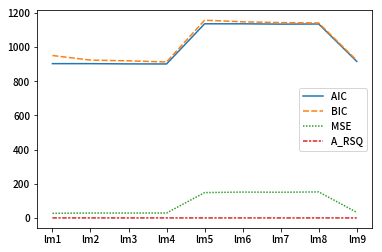

In [161]:
sn.lineplot(data = select_df)

### 因為lm1有兩個變數VIF太高，所以選用2,3,4,9

## 殘差分析
### error terms = y_actual - y_predicted

Text(0.5, 1.0, 'lr_9')

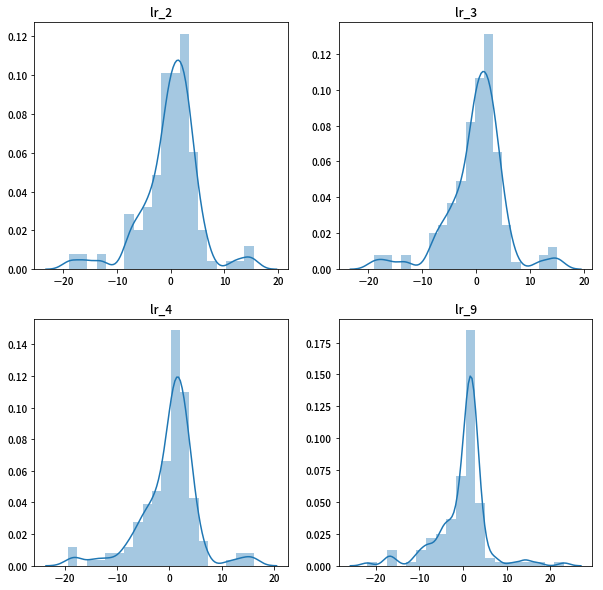

In [162]:
plt.figure(figsize=(10, 10))

plt.subplot(2,2,1)
y_pred2 = lm2.predict(x_lm2)
sn.distplot((y_train - y_pred2),bins = 20)
plt.title('lr_2')

plt.subplot(2,2,2)
y_pred3 = lm3.predict(x_lm3)
sn.distplot((y_train - y_pred3),bins = 20)
plt.title('lr_3')

plt.subplot(2,2,3)
y_pred4 = lm4.predict(x_lm4)
sn.distplot((y_train - y_pred4),bins = 20)
plt.title('lr_4')

plt.subplot(2,2,4)
y_pred9 = lm9.predict(x_lm9)
sn.distplot((y_train - y_pred9),bins = 20)
plt.title('lr_9')

In [163]:
data = {'train_y' : y_train, 'pred_y2' : y_pred2, 'pred_y3' : y_pred4, 'pred_y4' : y_pred4, 'pred_y9' : y_pred9}
train_pred_df = pd.DataFrame(data)
train_pred_df.head()

,train_y,pred_y2,pred_y3,pred_y4,pred_y9
0,68.60,68.462417,66.510871,66.510871,68.353057
1,58.51,59.333455,57.459050,57.459050,56.638129
2,62.40,59.532175,58.752916,58.752916,57.936862
3,63.60,62.256240,62.699211,62.699211,64.527058
4,49.90,34.476128,33.706109,33.706109,32.795836


In [164]:
train_pred_df['res_2'] = train_pred_df['train_y'] - train_pred_df['pred_y2']
train_pred_df['res_3'] = train_pred_df['train_y'] - train_pred_df['pred_y3']
train_pred_df['res_4'] = train_pred_df['train_y'] - train_pred_df['pred_y4']
train_pred_df['res_9'] = train_pred_df['train_y'] - train_pred_df['pred_y9']

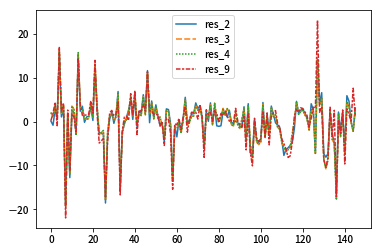

In [165]:
sn.lineplot(data = train_pred_df[['res_2', 'res_3', 'res_4', 'res_9']])

In [166]:
train_pred_df[['res_2','res_3', 'res_4', 'res_9']].sort_values(by  = ['res_2'], ascending = True).head()

,res_2,res_3,res_4,res_9
7,-18.948303,-19.307319,-19.307319,-21.991326
26,-18.588518,-17.789327,-17.789327,-17.176542
136,-16.287298,-17.666195,-17.666195,-17.147367
33,-15.703369,-14.841319,-14.841319,-16.745989
58,-13.150751,-13.591549,-13.591549,-15.441561


In [167]:
train_pred_df[['res_2','res_3', 'res_4', 'res_9']].sort_values(by  = ['res_2'], ascending = False).head()

,res_2,res_3,res_4,res_9
4,15.423872,16.193891,16.193891,17.104164
13,14.804792,15.788210,15.788210,14.522272
127,14.316462,14.395929,14.395929,23.172061
21,12.418938,13.198096,13.198096,14.015170
46,11.667879,11.210610,11.210610,11.405016


In [168]:
model_list = [lm2, lm3, lm4]
yhat_95 = []
for model in model_list:
    

SyntaxError: unexpected EOF while parsing (<ipython-input-168-a580f1197ba4>, line 4)

## 符合常態的資料應該長這樣

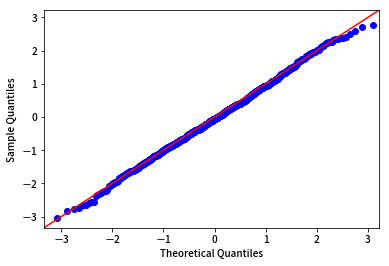

In [711]:
np.random.seed(0)
data = np.random.normal(0,1, 1000)
fig = sm.qqplot(data, line='45')

Text(0.5, 1.0, 'lr_9')

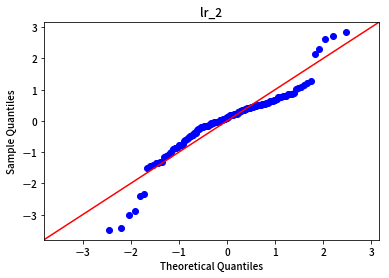

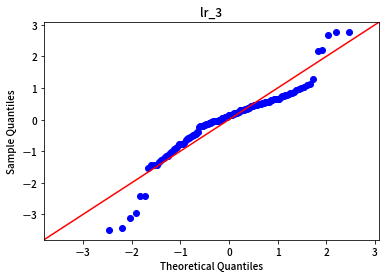

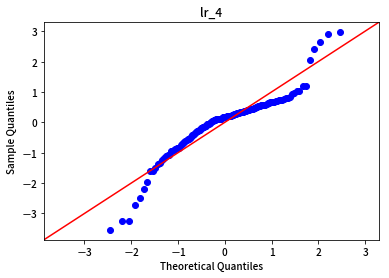

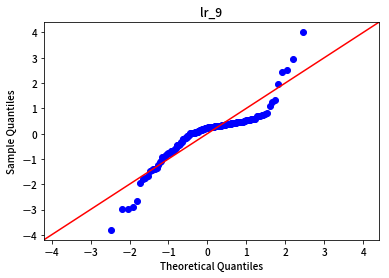

In [712]:
res_2 = lm2.resid_pearson
fig = sm.qqplot(res_2, line = '45')
plt.title('lr_2')

res_3 = lm3.resid_pearson
fig = sm.qqplot(res_3, line = '45')
plt.title('lr_3')

res_4 = lm4.resid_pearson
fig = sm.qqplot(res_4, line = '45')
plt.title('lr_4')

res_9 = lm9.resid_pearson
fig = sm.qqplot(res_9, line = '45')
plt.title('lr_9')


## Residuals vs predictiong variables plots
### look for independence assumption if residuals are distributed uniformly randomly around zero x_axes and no form specific clusters 

Text(0.5, 1.0, 'lm_9 residual plot')

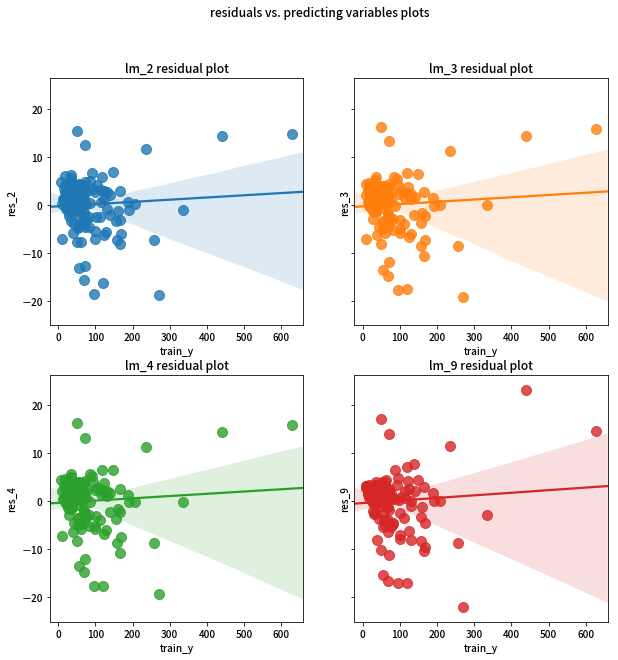

In [713]:
fig, axes = plt.subplots(2, 2, figsize =(10, 10), sharey = True)
fig.suptitle('residuals vs. predicting variables plots')

sn.regplot(ax = axes[0, 0],
           x = 'train_y', y = 'res_2',
           data = train_pred_df,
           scatter_kws = {'marker' : 'D', 's' : 100}
           )
axes[0,0].set_title('lm_2 residual plot')

sn.regplot(ax = axes[0,1],
           x = 'train_y', y = 'res_3',
           data = train_pred_df,
           scatter_kws = {'marker' : 'D', 's' : 100}
           )
axes[0,1].set_title('lm_3 residual plot')

sn.regplot(ax = axes[1,0],
           x = 'train_y', y = 'res_4',
           data = train_pred_df,
           scatter_kws = {'marker' : 'D', 's' : 100}
           )
axes[1,0].set_title('lm_4 residual plot')

sn.regplot(ax = axes[1,1],
           x = 'train_y', y = 'res_9',
           data = train_pred_df,
           scatter_kws = {'marker' : 'D', 's' : 100}
           )
axes[1,1].set_title('lm_9 residual plot')

In [714]:
train_pred_df.sort_values(by = ['res_2'], ascending=True).head() 

,train_y,pred_y2,pred_y3,pred_y4,pred_y9,res_2,res_3,res_4,res_9
7,270.99,289.938303,290.297319,290.297319,292.981326,-18.948303,-19.307319,-19.307319,-21.991326
26,95.00,113.588518,112.789327,112.789327,112.176542,-18.588518,-17.789327,-17.789327,-17.176542
136,120.10,136.387298,137.766195,137.766195,137.247367,-16.287298,-17.666195,-17.666195,-17.147367
33,68.28,83.983369,83.121319,83.121319,85.025989,-15.703369,-14.841319,-14.841319,-16.745989
58,55.00,68.150751,68.591549,68.591549,70.441561,-13.150751,-13.591549,-13.591549,-15.441561


In [715]:
train_pred_df.sort_values(by = ['res_2'], ascending=False).head() 

,train_y,pred_y2,pred_y3,pred_y4,pred_y9,res_2,res_3,res_4,res_9
4,49.90,34.476128,33.706109,33.706109,32.795836,15.423872,16.193891,16.193891,17.104164
13,628.01,613.205208,612.221790,612.221790,613.487728,14.804792,15.788210,15.788210,14.522272
127,440.20,425.883538,425.804071,425.804071,417.027939,14.316462,14.395929,14.395929,23.172061
21,71.68,59.261062,58.481904,58.481904,57.664830,12.418938,13.198096,13.198096,14.015170
46,235.22,223.552121,224.009390,224.009390,223.814984,11.667879,11.210610,11.210610,11.405016


## Fitted vs. residuals plot to check homoscedasticity

Text(0.5, 1.0, 'lm_9 residual plot')

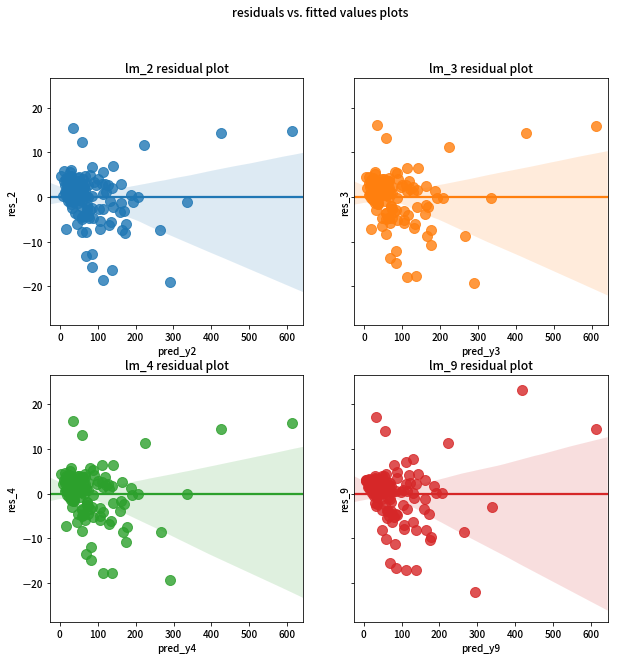

In [716]:
fig, axes = plt.subplots(2, 2, figsize =(10, 10), sharey = True)
fig.suptitle('residuals vs. fitted values plots')

sn.regplot(ax = axes[0, 0],
           x = 'pred_y2', y = 'res_2',
           data = train_pred_df,
           scatter_kws = {'marker' : 'D', 's' : 100})
axes[0,0].set_title('lm_2 residual plot')

sn.regplot(ax = axes[0,1],
           x = 'pred_y3', y = 'res_3',
           data = train_pred_df,
           scatter_kws = {'marker' : 'D', 's' : 100})
axes[0,1].set_title('lm_3 residual plot')

sn.regplot(ax = axes[1,0],
           x = 'pred_y4', y = 'res_4',
           data = train_pred_df,
           scatter_kws = {'marker' : 'D', 's' : 100})
axes[1,0].set_title('lm_4 residual plot')

sn.regplot(ax = axes[1,1],
           x = 'pred_y9', y = 'res_9',
           data = train_pred_df,
           scatter_kws = {'marker' : 'D', 's' : 100})
axes[1,1].set_title('lm_9 residual plot')